In [1]:
from src.Linear import *
from src.NonLinear import *
from src.mltools import *
from src.Loss import *
import numpy as np
from sklearn.model_selection import train_test_split

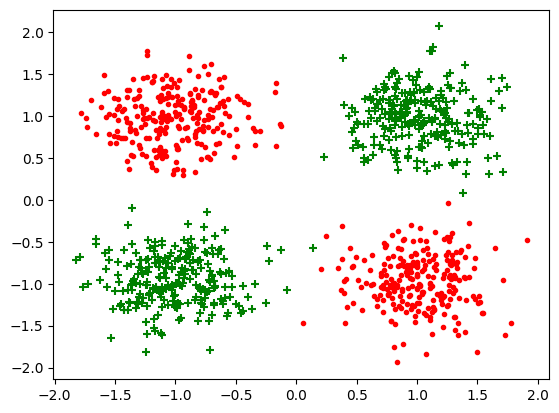

In [2]:
datax,datay= gen_arti(nbex=1000, data_type=1, epsilon=0.02)
plot_data(datax,datay)

In [3]:
trainx,testx,trainy,testy=train_test_split(datax,datay,train_size=0.9)

trainy=np.where(trainy==-1,0,1).reshape((-1,1))
testy=np.where(testy==-1,0,1).reshape((-1,1))

hidden_size=10
n=trainx.shape[1] #input layer neurons
iteration=1000

gradient_step = 1e-4
losses=[]

loss_mse = MseLoss()
lin_layer = Linear(n, hidden_size)
lin_layer2 = Linear(hidden_size,1)
act_sig = Sigmoid()
act_tan = TanH()

for _ in range(iteration):
    
    # forward
    hidden_lin = lin_layer.forward(trainx)
    hidden_tan = act_tan.forward(hidden_lin)
    hidden_lin2 = lin_layer2.forward(hidden_tan)
    hidden_sig = act_sig.forward(hidden_lin2)
    loss = loss_mse.forward(trainy, hidden_sig)

    # backward

    loss_back = loss_mse.backward(trainy, hidden_sig)
    losses.append(loss_back.mean())
    delta_sig = act_sig.backward_delta(hidden_lin2, loss_back)
    delta_lin2 = lin_layer2.backward_delta(hidden_tan, delta_sig)
    delta_tan = act_tan.backward_delta(hidden_lin, delta_lin2)
    delta_lin = lin_layer.backward_delta(trainx, delta_tan)

    lin_layer2.backward_update_gradient(hidden_tan, delta_sig)
    lin_layer.backward_update_gradient(trainx, delta_tan)

    lin_layer2.update_parameters(learning_rate=gradient_step)
    lin_layer.update_parameters(learning_rate=gradient_step)

    lin_layer2.zero_grad()
    lin_layer.zero_grad()

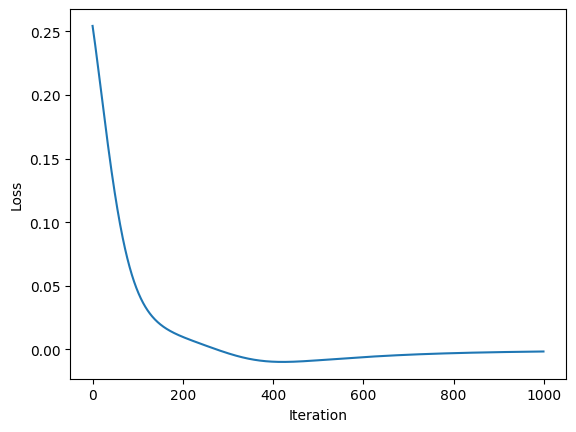

In [4]:
plt.plot(np.arange(iteration), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [5]:
def predict(x):
    hidden_l = lin_layer.forward(x)
    hidden_tan = act_tan.forward(hidden_l)
    hidden_l2 = lin_layer2.forward(hidden_tan)
    hidden_sig = act_sig.forward(hidden_l2)
    return np.where(hidden_sig >= 0.5, 1, 0)

In [6]:
#score_train = (trainy == predict(trainx)).mean()
score_test = (testy == predict(testx)).mean()
#print(f"Accuracy en train : {score_train}")
print(f"Accuracy en test : {score_test}")



Accuracy en test : 1.0


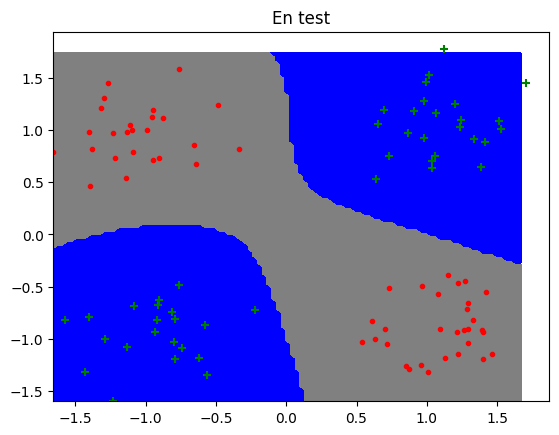

In [7]:
plot_frontiere(testx, predict, step=100)
plot_data(testx, testy.reshape(-1))
plt.title("En test")
plt.show()

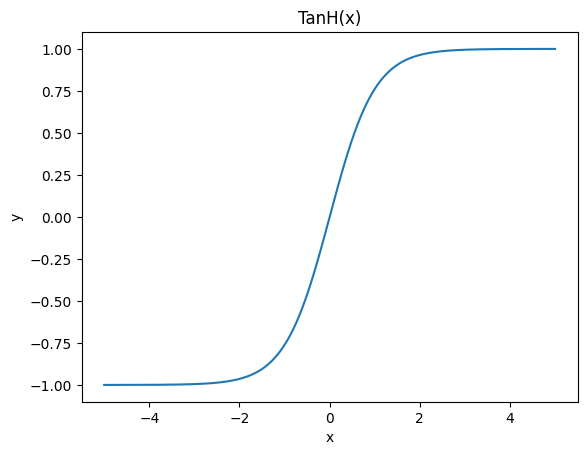

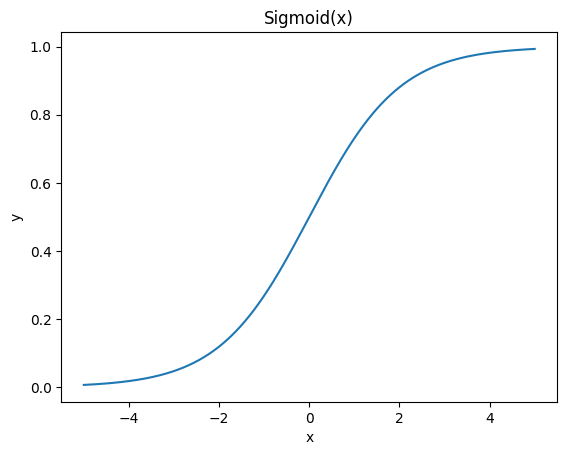

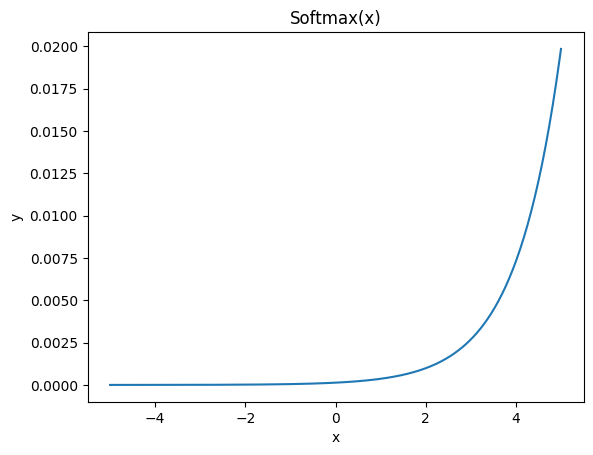

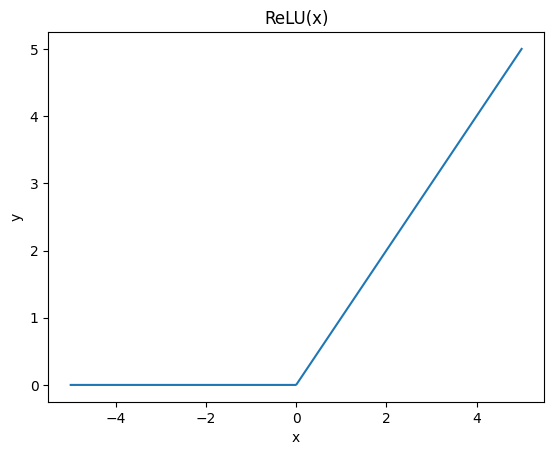

In [8]:
all=[TanH(),Sigmoid(),Softmax(),ReLU()]

X = np.linspace(-5, 5, 500)

def plot_activation(activation, data):
    plt.plot(data, activation.forward(data))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{activation.__class__.__name__}(x)")
    plt.show()


for act in all:
    plot_activation(act, X)